## Catchment Area for Deer Island Wastewater Treatment Plant

In [1]:
import geopandas as gp
import shapely 
import matplotlib.pyplot as plt
import contextily as cx

In [2]:
# Open catchment shapefile
c_area = gp.read_file("../data/Deer_Island_catchment_full/Deer_Island_Catchment_full.shp")
c_area.head(5)

,TOWN_ID,TOWN,FIPS_STCO,POP1980,POP1990,POP2000,POP2010,POPCH80_90,POPCH90_00,POPCH00_10,FOURCOLOR,TYPE,ISLAND,SHAPE_AREA,SHAPE_LEN,geometry
0,342,WILMINGTON,25017,17442,17651,21367,22325,209,3716,958,2,T,0,4.442178e+07,31369.102940,"POLYGON ((227497.924 927551.501, 227579.844 92..."
1,48,BURLINGTON,25017,22959,23302,22876,24498,343,-426,1622,4,T,0,3.071246e+07,23368.211376,"POLYGON ((227111.794 918384.061, 227232.224 91..."
2,305,WAKEFIELD,25017,25112,24825,24804,24932,-287,-21,128,2,T,0,2.066149e+07,21647.170934,"POLYGON ((234897.734 920144.061, 235530.574 91..."
3,73,DEDHAM,25021,24399,23782,23464,24729,-617,-318,1265,3,T,0,2.765179e+07,26563.272465,"POLYGON ((225723.704 892264.691, 225741.074 89..."
4,189,MILTON,25021,25696,25725,26062,27003,29,337,941,2,T,0,3.418377e+07,33001.366045,"POLYGON ((235895.594 891221.311, 235902.254 89..."


In [3]:
# open Deer Island WTP location shapefile
di_wtp = gp.read_file("../data/Deer_Island_WTP/mwra_deer_island_WTP.shp")
di_wtp

,SOURCE_ID,EPA_SYSTEM,REGISTRY_I,STATUTE,CWP_NAME,CWP_STREET,CWP_CITY,CWP_STATE,CWP_STATE_,CWP_ZIP,...,FAC_TRI_RE,CWP_CURR_3,CWP_13QTRS,SIC_CODES,NAICS_CODE,CASE_IDS,STATE_WATE,STATE_WA_1,OBJECTID,geometry
0,MA0103284,ICP,110025247720,CWA,MWRA DEER ISLAND TREATMENT PLANT,190 TAFTS AVE,BOSTON,MA,None,02152,...,None,Yes,___VVVVVVVVSV,4952,None,None,01090001,ATLANTIC OCEAN (BOSTON HARBOR),169799,POINT (-7898885.197 5213627.803)


In [4]:
print(c_area.crs)
print(di_wtp.crs)
di_wtp_c_area_crs = di_wtp.to_crs(epsg=26986)
print(di_wtp_c_area_crs.crs)

epsg:26986
epsg:3857
epsg:26986


In [5]:
# point layer for labels
## find centroids for catchment area towns
c_area["center"] = c_area["geometry"].centroid
c_area_points = c_area.copy()
c_area_points.set_geometry("center", inplace = True)

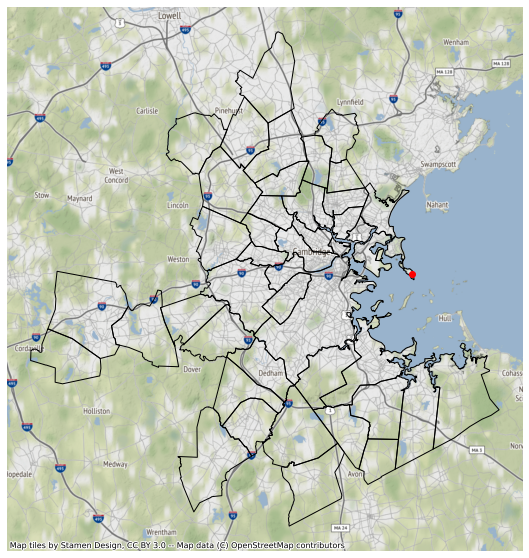

In [19]:
# plot the catchment area map with labels
ax = c_area.to_crs(epsg=3857).plot(facecolor="none", edgecolor='black', figsize=(10,10))
di_wtp_c_area_crs.to_crs(epsg=3857).plot(ax = ax, color='red')
cx.add_basemap(ax)
ax.set_axis_off()

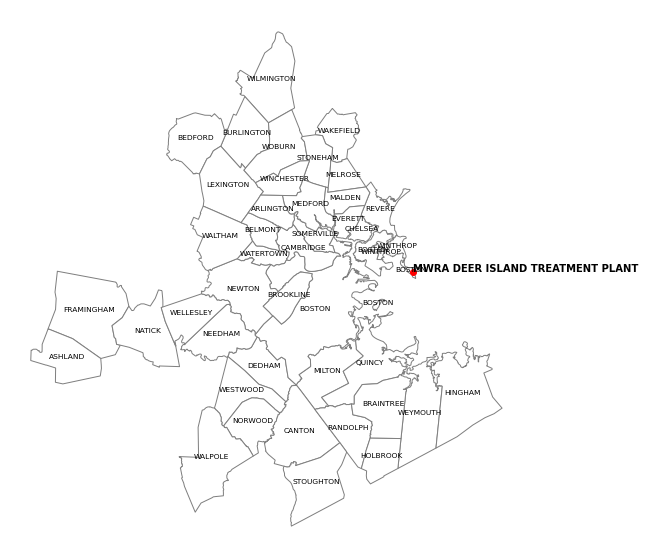

In [7]:
## add labels for cities and towns to the map
ax = c_area.plot(color='white', edgecolor='grey', figsize=(10,10))
di_wtp_c_area_crs.plot(ax = ax, color='red')
ax.set_axis_off()
texts = []
for x, y, label in zip(c_area_points.geometry.x, c_area_points.geometry.y, c_area_points["TOWN"]):
    texts.append(plt.text(x, y, label, fontsize = 7.5, horizontalalignment='center'))
textsdi = []
for x, y, label in zip(di_wtp_c_area_crs.geometry.x, di_wtp_c_area_crs.geometry.y, di_wtp_c_area_crs["CWP_NAME"]):
    textsdi.append(plt.text(x, y, label, fontsize = 10, weight='bold', horizontalalignment='left'))
plt.show()